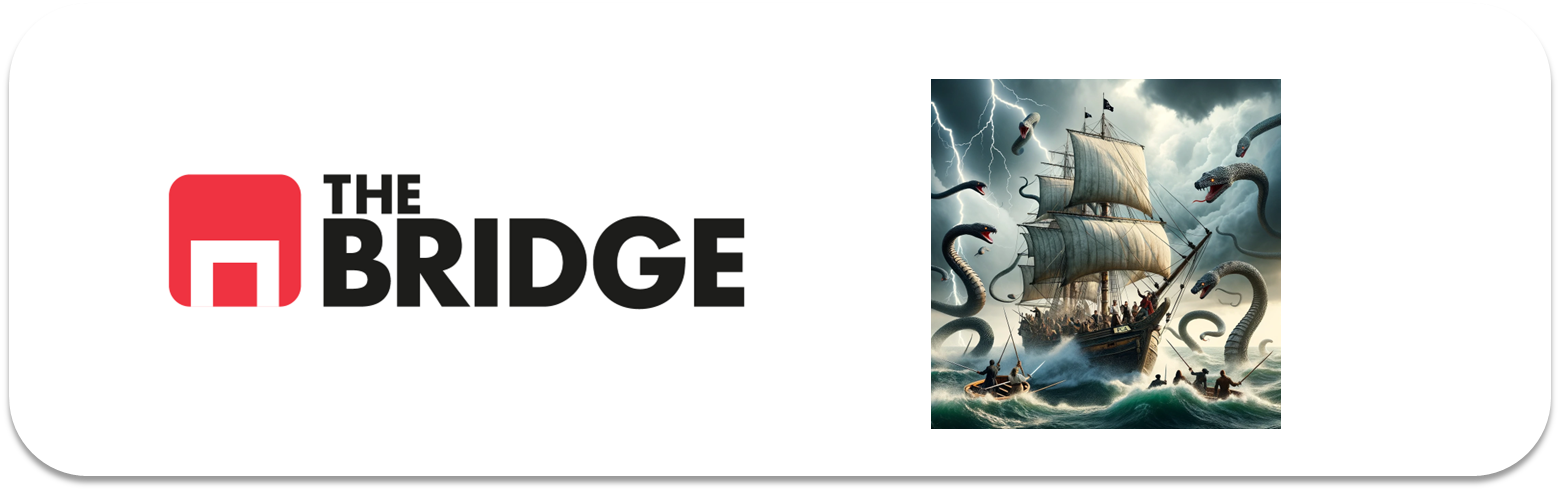

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bootcampviztools import *

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.



In [30]:
# 1

In [2]:
df = pd.read_csv('./data/credit_npo.csv')

In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      11816 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  11816 non-null  float64
 2   age                                   11816 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  11816 non-null  int64  
 4   DebtRatio                             11816 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       11816 non-null  int64  
 7   NumberOfTimes90DaysLate               11816 non-null  int64  
 8   NumberRealEstateLoansOrLines          11816 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  11816 non-null  int64  
 10  NumberOfDependents                    11816 non-null  float64
dtypes: float64(4), int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,11816.0,0.070244,0.255568,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,11816.0,0.335668,0.365209,0.0,0.034927,0.179183,0.587187,6.0
age,11816.0,51.447698,14.516270,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,11816.0,0.340471,2.927409,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,11816.0,0.499708,2.696067,0.0,0.143456,0.294748,0.477414,96.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,11816.0,8.759140,5.129772,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,11816.0,0.180010,2.892577,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,11816.0,1.059580,1.140716,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,11816.0,0.149712,2.868248,0.0,0.000000,0.000000,0.000000,98.0


In [9]:
df.rename(columns = {'SeriousDlqin2yrs':'target'}, inplace=True)

In [25]:
# voy a pasar todas esas columnas que empeizan con 'NumberOf' en categóricas

In [12]:
NumberOf_columns = []
for x in df.columns:
    if x.startswith('NumberOf'):
        NumberOf_columns.append(x)

In [21]:
def dias_tarde(x):
    if x == 0:
        return 'nunca'
    elif x == 1:
        return 'una vez'
    else:
        return 'reincidente'

In [22]:
df['NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].map(dias_tarde)
df['NumberOfTimes90DaysLate'] = df['NumberOfTimes90DaysLate'].map(dias_tarde)
df['NumberOfTime60-89DaysPastDueNotWorse'] = df['NumberOfTime60-89DaysPastDueNotWorse'].map(dias_tarde)

In [26]:
df['NumberOfOpenCreditLinesAndLoans'] = df['NumberOfOpenCreditLinesAndLoans'].apply(lambda x: 'ninguno' if x == 0 else ('entre 1 y 5' if 1 <= x <= 5 else 'más de 5'))

In [27]:
df['NumberOfDependents'] = df['NumberOfDependents'].apply(lambda x: 'ninguno' if x == 0 else ('uno o dos' if 1 <= x <= 2 else 'más de dos'))

In [28]:
df[NumberOf_columns]

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,nunca,más de 5,una vez,nunca,ninguno
1,nunca,más de 5,nunca,nunca,ninguno
2,nunca,entre 1 y 5,nunca,nunca,uno o dos
3,nunca,entre 1 y 5,nunca,nunca,más de dos
4,nunca,entre 1 y 5,nunca,nunca,uno o dos
...,...,...,...,...,...
12532,nunca,más de 5,nunca,nunca,ninguno
12533,nunca,más de 5,nunca,nunca,ninguno
12534,nunca,más de 5,nunca,nunca,uno o dos
12535,nunca,más de 5,nunca,nunca,uno o dos


In [29]:
for x in df[NumberOf_columns]:
    print(df[x].value_counts())
    print('\n')

NumberOfTime30-59DaysPastDueNotWorse
nunca          9818
una vez        1354
reincidente     644
Name: count, dtype: int64


NumberOfOpenCreditLinesAndLoans
más de 5       8503
entre 1 y 5    3201
ninguno         112
Name: count, dtype: int64


NumberOfTimes90DaysLate
nunca          11156
una vez          394
reincidente      266
Name: count, dtype: int64


NumberOfTime60-89DaysPastDueNotWorse
nunca          11206
una vez          478
reincidente      132
Name: count, dtype: int64


NumberOfDependents
ninguno       6413
uno o dos     4182
más de dos    1221
Name: count, dtype: int64




In [31]:
# 2

In [33]:
#hacemos el split

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = 'target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9452, 10)
(2364, 10)
(9452,)
(2364,)


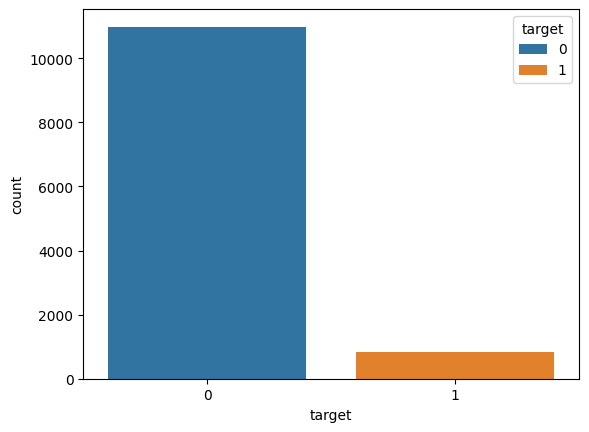

In [37]:
sns.countplot(df, x='target', hue = 'target');

In [38]:
df['target'].value_counts(True)

target
0    0.929756
1    0.070244
Name: proportion, dtype: float64

In [39]:
# se ve desbalanceado

In [44]:
num_cols = []
cat_cols = []
for x in df:
    if x != 'target':
        if pd.api.types.is_numeric_dtype(df[x]):
            num_cols.append(x)
        else:
            cat_cols.append(x)

In [53]:
# vamos a ahcer un heatmap para ver las correlaciones

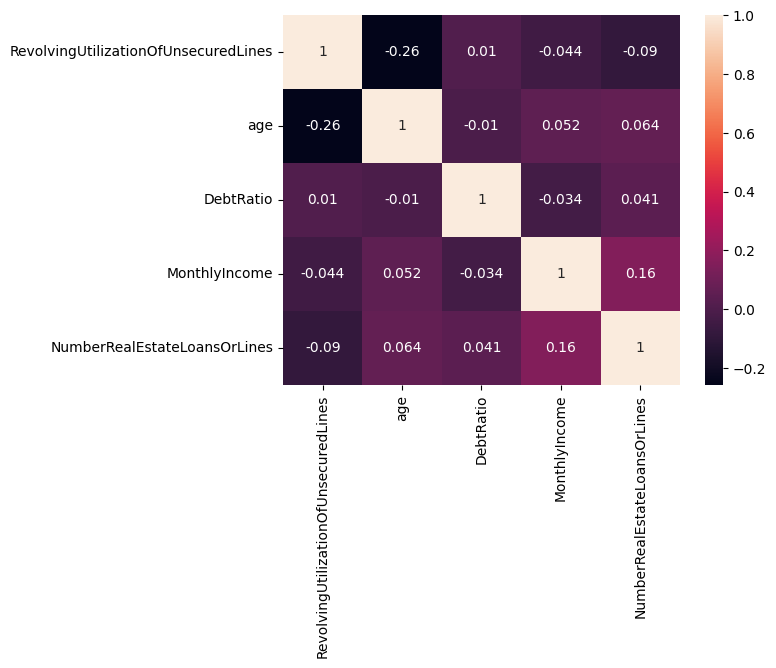

In [56]:
sns.heatmap(X_train[num_cols].corr(), annot=True);

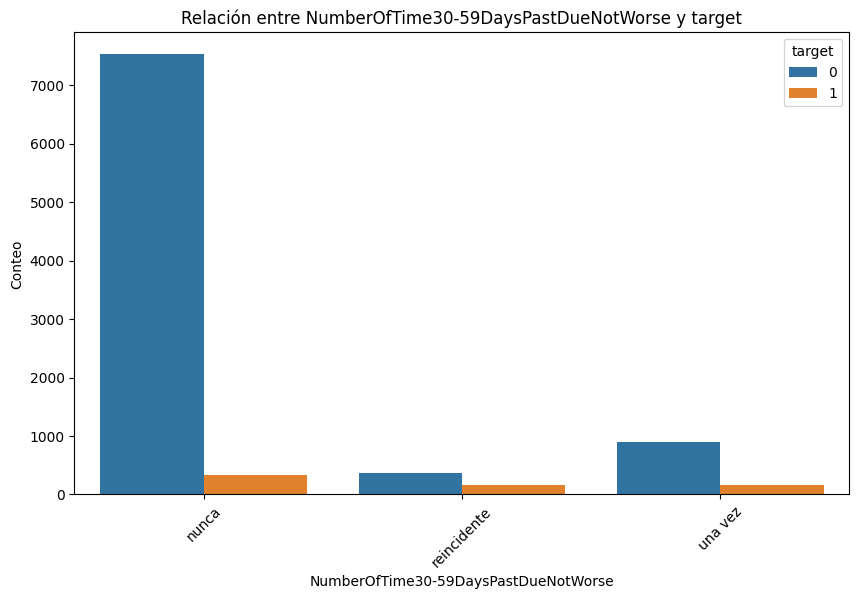

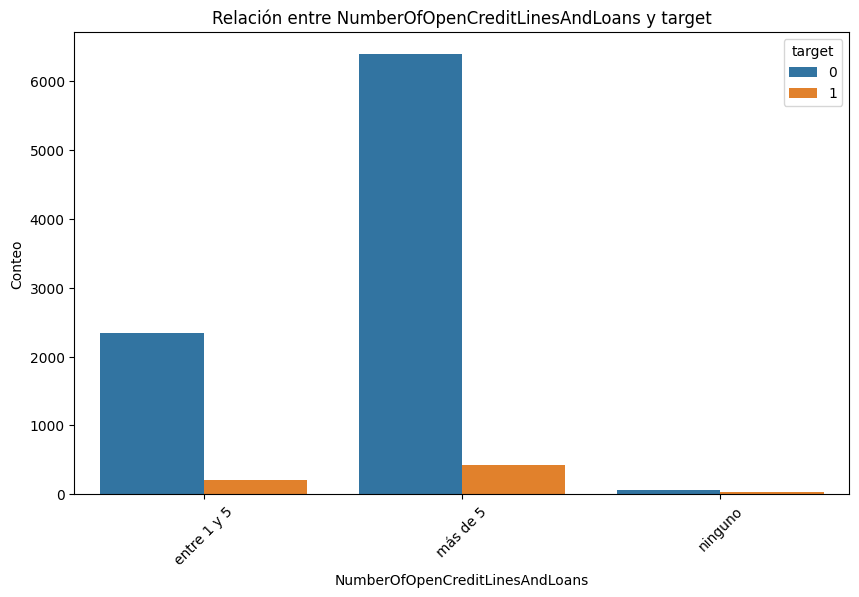

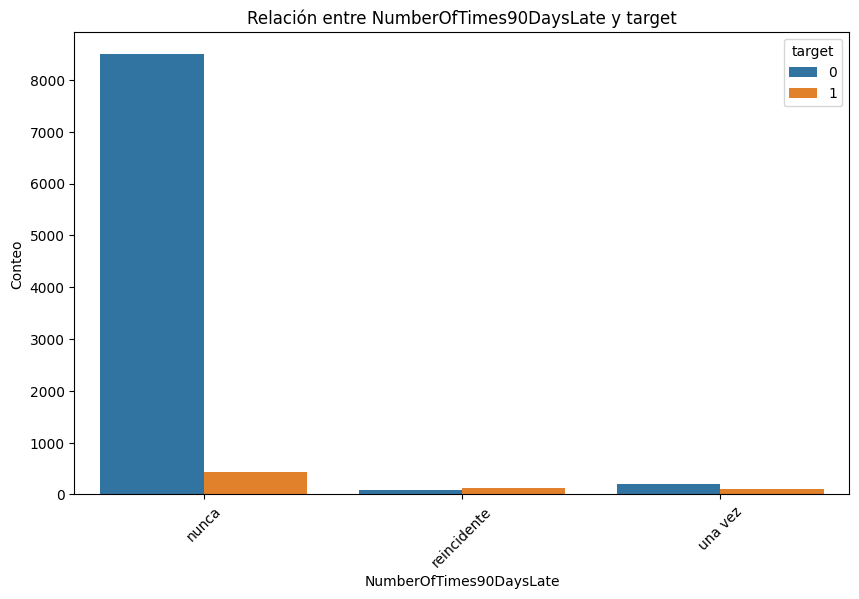

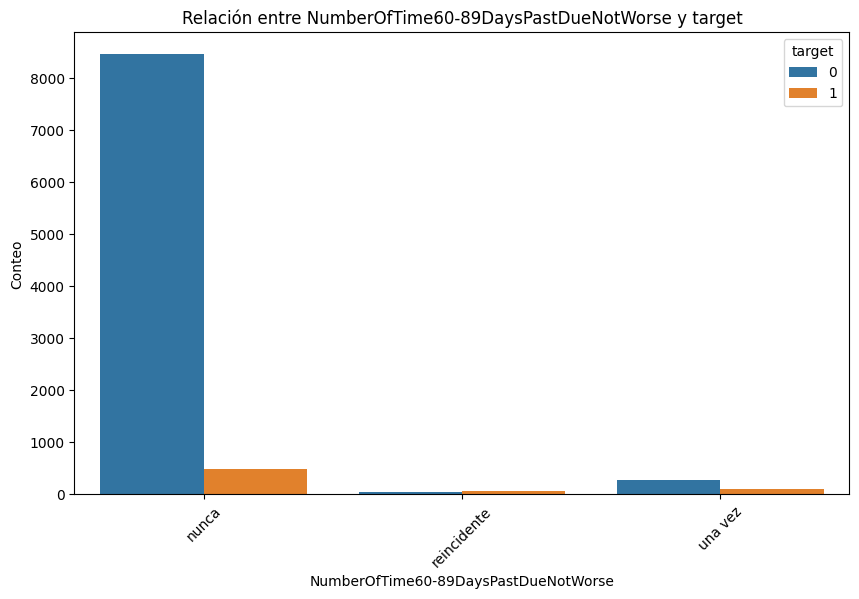

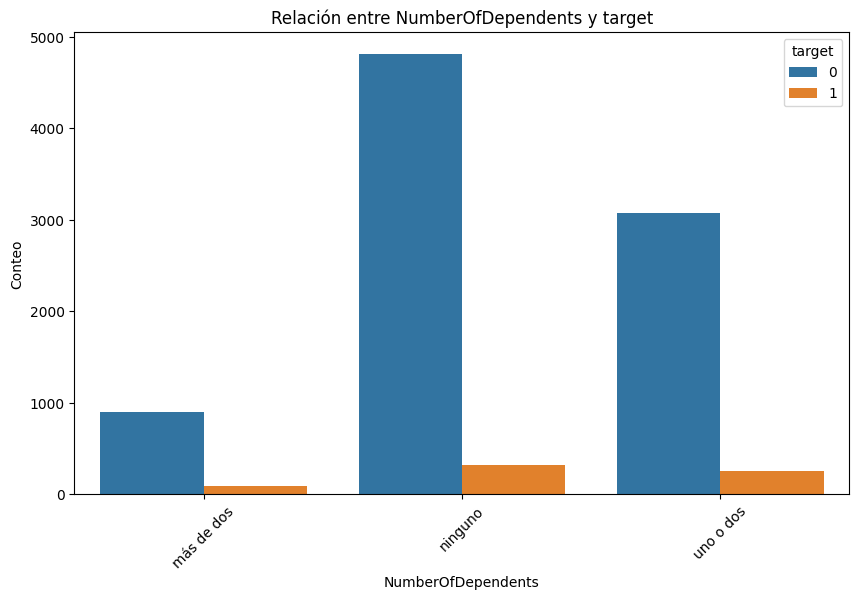

ValueError: cannot insert target, already exists

In [71]:
dff = X_train.copy()
dff['target'] = y_train
copia = cat_cols.copy()
copia.append('target')
for x in copia:
    plot_categorical_relationship_fin(dff[copia], x, 'target', size_group=3)

In [72]:
# ANOVA
from sklearn.feature_selection import SelectKBest, f_classif

In [108]:
selector_num = SelectKBest(f_classif, k=2) # por elegir menos de las que tengo
X_num = selector_num.fit_transform(X_train[num_cols], y_train)
num_features_anova = X_train[num_cols].columns[selector_num.get_support()].to_list()
num_features_anova

['RevolvingUtilizationOfUnsecuredLines', 'age']

In [83]:
col_categoricas = pd.get_dummies(X_train[cat_cols])

In [110]:
from sklearn.feature_selection import mutual_info_classif
x = mutual_info_classif(col_categoricas, y_train)
valores = pd.Series(x, index=col_categoricas.columns).sort_values(ascending=False)
columnas_MIC = valores.head(5).index.to_list()
columnas_MIC

['NumberOfTimes90DaysLate_nunca',
 'NumberOfTimes90DaysLate_reincidente',
 'NumberOfTime30-59DaysPastDueNotWorse_nunca',
 'NumberOfTime60-89DaysPastDueNotWorse_nunca',
 'NumberOfTime30-59DaysPastDueNotWorse_reincidente']

In [92]:
# voy a codificar las columnas categoricas a números para poder seguir

In [93]:
X_train['NumberOfTime30-59DaysPastDueNotWorse'] = X_train['NumberOfTime30-59DaysPastDueNotWorse'].map({'nunca':0, 'una vez':1, 'reincidente':2})
X_train['NumberOfOpenCreditLinesAndLoans'] = X_train['NumberOfOpenCreditLinesAndLoans'].map({'más de 5':2, 'entre 1 y 5':1, 'ninguno':0})
X_train['NumberOfTimes90DaysLate'] = X_train['NumberOfTimes90DaysLate'].map({'nunca':0, 'una vez':1, 'reincidente':2})
X_train['NumberOfTime60-89DaysPastDueNotWorse'] = X_train['NumberOfTime60-89DaysPastDueNotWorse'].map({'nunca':0, 'una vez':1, 'reincidente':2})
X_train['NumberOfDependents'] = X_train['NumberOfDependents'].map({'ninguno':0, 'uno o dos':1, 'más de dos':2})
#ahora test
X_test['NumberOfTime30-59DaysPastDueNotWorse'] = X_test['NumberOfTime30-59DaysPastDueNotWorse'].map({'nunca':0, 'una vez':1, 'reincidente':2})
X_test['NumberOfOpenCreditLinesAndLoans'] = X_test['NumberOfOpenCreditLinesAndLoans'].map({'más de 5':2, 'entre 1 y 5':1, 'ninguno':0})
X_test['NumberOfTimes90DaysLate'] = X_test['NumberOfTimes90DaysLate'].map({'nunca':0, 'una vez':1, 'reincidente':2})
X_test['NumberOfTime60-89DaysPastDueNotWorse'] = X_test['NumberOfTime60-89DaysPastDueNotWorse'].map({'nunca':0, 'una vez':1, 'reincidente':2})
X_test['NumberOfDependents'] = X_test['NumberOfDependents'].map({'ninguno':0, 'uno o dos':1, 'más de dos':2})

In [88]:
# SelectFromModel

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rforest = RandomForestClassifier(random_state= 42)

In [114]:
selector_model = SelectFromModel(estimator = rforest, threshold= "median", max_features=5)
selector_model.fit(X_train,y_train)
SFM = selector_model.get_feature_names_out().tolist()
SFM

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate']

In [100]:
# RFE

In [101]:
from sklearn.feature_selection import RFE

In [116]:
rfe = RFE(estimator = rforest, n_features_to_select= 5, step = 1) 

rfe.fit(X_train, y_train)
print(rfe.ranking_)
rfe.transform(X_train)
RFE = rfe.get_feature_names_out().tolist()
RFE

[1 1 2 1 1 6 1 3 4 5]


['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfTimes90DaysLate']

In [103]:
# SFS

In [104]:
from sklearn.feature_selection import SequentialFeatureSelector

In [117]:
sfs_forward = SequentialFeatureSelector(rforest, n_features_to_select = 5, cv = 4,scoring = "balanced_accuracy")
sfs_forward.fit(X_train, y_train)
SFS = sfs_forward.get_feature_names_out().tolist()
SFS

['RevolvingUtilizationOfUnsecuredLines',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [118]:
# hard-voting

In [119]:
from collections import Counter

In [145]:
features_hard_voting = num_features_anova + SFM + RFE + SFS
votos = Counter(features_hard_voting)
votos

Counter({'RevolvingUtilizationOfUnsecuredLines': 4,
         'age': 3,
         'NumberOfTimes90DaysLate': 3,
         'DebtRatio': 2,
         'MonthlyIncome': 2,
         'NumberOfOpenCreditLinesAndLoans': 1,
         'NumberOfTime60-89DaysPastDueNotWorse': 1,
         'NumberOfDependents': 1})

In [146]:
seleccion = [x for x,y in votos.most_common(6)]
seleccion

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTimes90DaysLate',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans']

In [32]:
# 3

In [133]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [134]:
gbm = LGBMClassifier(random_state=42)
cat = CatBoostClassifier(verbose = 0, random_state=42)

In [160]:
#he tenido que quitar un método de la lista porque me daba problemas

In [147]:
listas = {
    'anova':num_features_anova,
    'SFM':SFM,
    'RFE':RFE,
    'SFS':SFS,
    'Hard_voting':seleccion}

In [148]:
modelos = {
    'rforest':rforest,
    'gbm':gbm,
    'cat':cat
}

resultado = []
for nombre, modelo in modelos.items():
    for x,y in listas.items():
        x_Train = X_train[y]
        cros = np.mean(cross_val_score(modelo, x_Train, y_train, cv=5, scoring = 'recall'))
        resultado.append({
            'modelo': nombre,
            'metodo selecion features': x,
            'score': cros
        })
        

[LightGBM] [Info] Number of positive: 530, number of negative: 7031
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 331
[LightGBM] [Info] Number of data points in the train set: 7561, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070097 -> initscore=-2.585207
[LightGBM] [Info] Start training from score -2.585207
[LightGBM] [Info] Number of positive: 530, number of negative: 7031
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000069 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 7561, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.070097 -> initscore=-2.585207
[LightGBM] [In

In [152]:
eleccion = pd.DataFrame(resultado).sort_values(by='score', ascending=False)
eleccion.head(1)

,modelo,metodo selecion features,score
3,rforest,SFS,0.28216


In [153]:
# aqui tenemos al ganador que es randomforest, como no, con la seleccion de features con SequentialFeatureSelector

In [123]:
# 4

In [154]:
from sklearn.model_selection import GridSearchCV

In [156]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(
    rforest,
    param_grid = param_grid,
    scoring = 'recall_macro',
    cv = 5,
    verbose = 0,
    n_jobs = -1
)

grid.fit(X_train[SFS], y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='recall_macro')

In [157]:
grid.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 400}

In [158]:
#hacemos el predict

In [159]:
from sklearn.metrics import balanced_accuracy_score

pred = grid.predict(X_test[SFS])
print(balanced_accuracy_score(y_test, pred))

0.5721043120858874


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.